# Function point of DPT

In [1]:
from handcalcs import render
from math import *

In [2]:
%%render 
Ioe_rms =  7.636
Ipeak = Ioe_rms*sqrt(2) # A

<IPython.core.display.Latex object>

In [3]:
# we will shose 11A 

%%render
Pout= 1200 # 
eff = 0.9
VinMin = 360
Iin_DC = Pout/(eff*VinMin )
DutyCycle = 0.5 
Irms = Iin_DC /DutyCycle
Ipeak2 = Irms*sqrt(2) # A i found 10.476A close 

# Current prob 

In [4]:
%%render 
# 0R007 3W 2512 3W 1%
Rsh= 7e-3 
Vpeak = Rsh*Ipeak # V

<IPython.core.display.Latex object>

In [5]:
%%render 
# resolution
# TDS3034
# https://www.testequipmenthq.com/datasheets/TEKTRONIX-TDS3034B-Datasheet.pdf
Vdiv = 1e-3
Nbits = 9
Vrange = Vdiv *10
resolution_uV = 1e6*Vrange /2**Nbits # 19.531µV


<IPython.core.display.Latex object>

In [6]:
%%render 
Rinp = 50
Rsh_equi= Rsh*Rinp /(Rsh+Rinp) # Rsh= 7mohm 
error= 1e6*(Rsh-Rsh_equi)/Rsh # ppm

<IPython.core.display.Latex object>

In [7]:
Rsh_equi

0.006999020137180795

# Mosfet 

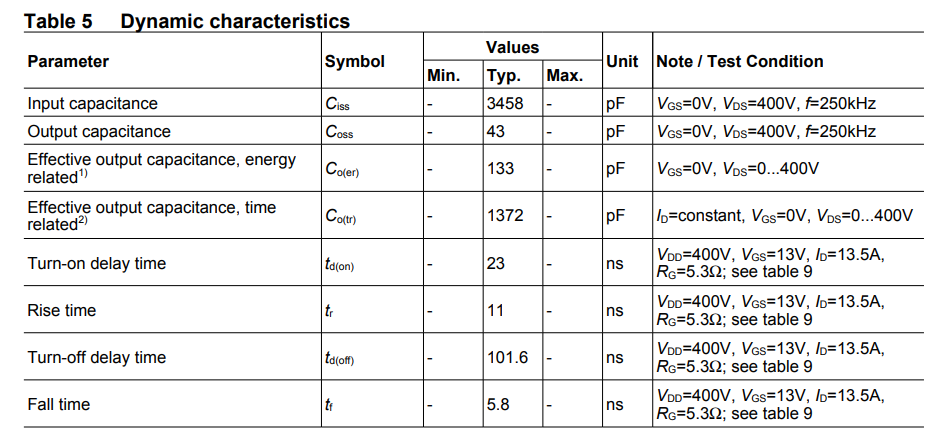

For ringing frequency and inductance estimation, use Coss at the actual VDS during ringing (43 pF at 400 V in your case).

For energy loss calculations, use Co(er) (133 pF).

**Q1) Can DPT help find loop inductance between MOSFETs and DC link?**


  During DPT, measure **Vds overshoot** and ringing after turn-off. The ringing frequency depends on **Coss and loop inductance (Lloop)**:
  
  $ f\_\text{ring} \approx \frac{1}{2\pi\sqrt{L_{loop} \cdot C_{oss}}} $
  
  From measured ringing frequency and known Coss, you can estimate Lloop.
  

✅ So DPT can reveal **parasitic inductance** via voltage ringing analysis.

In [8]:
%%render 
C_oss =43e-12 
L_loop= 20e-9
f_ringMhz = 1e-6/(2*pi*sqrt(L_loop*C_oss)) # Mhz 

<IPython.core.display.Latex object>

In [13]:
%%render 
f_ringMhz= 76.9 # Hz 
C_oss =43e-12 # 43pF
L_loop= 1/((2*pi*f_ringMhz*1e6)**2*C_oss) # H
L_loop_nH=L_loop*1e9 # nH

<IPython.core.display.Latex object>

In [10]:
E=400
dt= 2e-6
L = 50e-6
I = E*dt/L
I

15.999999999999998